##  파산한 은행 데이타집합에서 분기별 은행수를 계산하기


    1. 먼저 데이타 구조를 파악하기

    2. 'Closing Date' 날짜 항목을 datetime 오브젝트로 변경하기

    3. 'Closing Date' 날짜 정보에서 dt 접근자를 이용하여 연도(year)와 분기(quarter)를 구하기

    4.  연도별 파산은행 수 구하기

    5. 연도별, 분기별 파산은행 수 구하기

    6. 정보 시각화
    
    
    [도서] Do it 데이타분석을 위한 판다스 입문

In [5]:
import pandas as pd

banks = pd.read_csv('./data/banklist.csv')

# (1) 먼저 데이타 구조를 파악하기
banks.head()
# banks.info()

# (2) Closing Date를 datetime 오브젝트로 변경
banks = pd.read_csv('./data/banklist.csv', parse_dates=['Closing Date'])
banks.info()
# parse_dates에 s가 있다는 것은 복수개라는 의미
# banks = pd.read_csv('./data/banklist.csv', parse_dates=['Closing Date','Updated Date'])
# banks.info()

# (3) 날짜 정보에서 dt 접근자를 이용하여 연도(year)와 분기(quarter)를 구한다
banks['closing_year'] = banks['Closing Date'].dt.year
banks['closing_quarter'] = banks['Closing Date'].dt.quarter
banks.head()

# 2개 이상의 값을 추가 할 수 있다
# banks['closing_year'], banks['closing_quarter'] = ( banks['Closing Date'].dt.year, banks['Closing Date'].dt.quarter)
# banks.head()

# (4) 연도별 파산은행 수 구하기
closing_year = banks.groupby(['closing_year']).size()
print(closing_year)

# (5) 연도별, 분기별 파산은행 수 구하기
closing_year_q = banks.groupby(['closing_year','closing_quarter']).size()
print(closing_year_q)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555 entries, 0 to 554
Data columns (total 7 columns):
Bank Name                555 non-null object
City                     555 non-null object
ST                       555 non-null object
CERT                     555 non-null int64
Acquiring Institution    555 non-null object
Closing Date             555 non-null datetime64[ns]
Updated Date             555 non-null object
dtypes: datetime64[ns](1), int64(1), object(5)
memory usage: 30.4+ KB
closing_year
2000      2
2001      4
2002     11
2003      3
2004      4
2007      3
2008     25
2009    140
2010    157
2011     92
2012     51
2013     24
2014     18
2015      8
2016      5
2017      8
dtype: int64
closing_year  closing_quarter
2000          4                   2
2001          1                   1
              2                   1
              3                   2
2002          1                   6
              2                   2
              3                   1
    

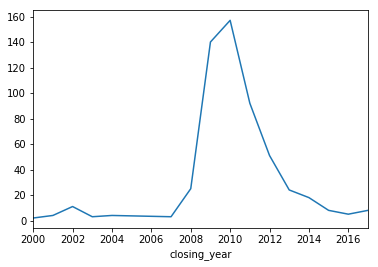

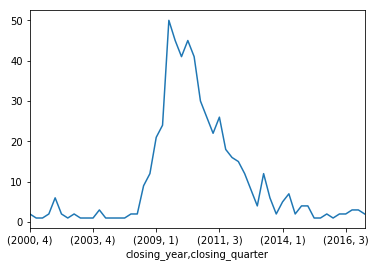

In [7]:
""" 결과를 시각화 """
%matplotlib inline
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax = closing_year.plot()
plt.show()

fig, ax = plt.subplots()
ax = closing_year_q.plot()
plt.show()
